In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
import tqdm.notebook as tqdm
import colorsys
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), os.pardir)))
from im_net import datamanager, plotting
import im_net.helper_functions as hf
%load_ext autoreload
%autoreload 2

# Main Results Figure of the Paper
To generate the results shown in the figure, you have to run all models with the corresponding goal function in the `setups` list below for the different hidden layer sizes. The sparse version of the `infomorphic_context_lateral/optimized_1_100` model can be run by setting the parameter `layer_params.hidden_layer1.max_connections` to 100.

<details>
  <summary>Click here to get run scripts for the figure:</summary>
  - 
  ```bash
  - 
</details>

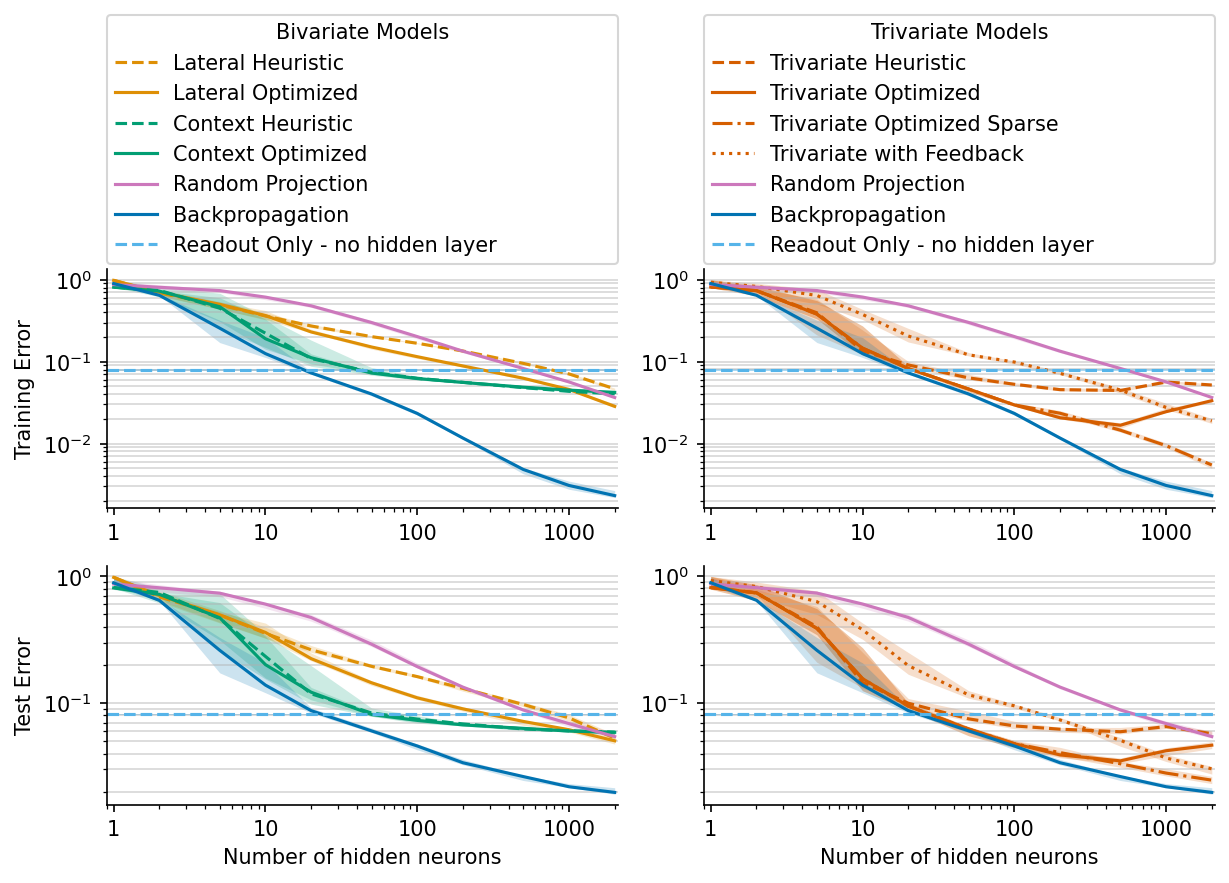

In [108]:

colors = sns.color_palette('colorblind', 10)
c_idx = [1,1,2,2,3,3,3,3,4,0]
bivariate_models = ['infomorphic_lateral/naive','infomorphic_lateral/optimized_2_100','infomorphic_context/naive', 'infomorphic_context/optimized_2_100']
trivariate_models = ['infomorphic_context_lateral/naive','infomorphic_context_lateral/optimized_1_100','infomorphic_context_lateral/optimized_1_100','infomorphic_context_lateral_with_feedback/optimized_1_100']
baselines = ['infomorphic_random_projection/naive', 'global_backprop/naive']
labels = ['Lateral Heuristic', 'Lateral Optimized', 'Context Heuristic', 'Context Optimized', 'Trivariate Heuristic', 'Trivariate Optimized', 'Trivariate Optimized Sparse', 'Trivariate with Feedback', 'Random Projection', 'Backpropagation', 'Readout Only - no hidden layer']
linestyle = ['--','-','--','-', '--', '-', '-.', ':', '-', '-']
layer_size = [1,2,5,10,20,50,100,200,500,1000,2000]

fig, ax = plt.subplots(2, 2, figsize=(8.3, 6), sharex=True, dpi=150)

for setup_idx, setup in enumerate(bivariate_models):
    dm = datamanager.DataManager(f'/data/neuhaus/paper_final_runs/MNIST/{setup}/multiruns', mode='analysis', add_run_properties=True)
    dm.sel = dm.all[dm.all['finished'] == True]
    dm.sel = dm.sel.sort_values(['layer_params.hidden_layer1.output_size', 'exp_params.seed'])

    performances = dm.load_selected('performance')
    all_performances = np.zeros((len(performances), 2))
    for p_idx, p in enumerate(performances):
        all_performances[p_idx] = [p['train_acc'][-1], p['test_acc'][-1]]
    all_performances = np.reshape(all_performances, (len(layer_size), -1, 2))
    for i in range(2):
        ax[i,0].plot(layer_size, 1-np.median(all_performances, axis=1)[:, i], label=labels[setup_idx], color=colors[c_idx[setup_idx]], linestyle=linestyle[setup_idx])
        ax[i,0].fill_between(layer_size, 1-np.min(all_performances, axis=1)[:, i], 1-np.max(all_performances, axis=1)[:, i], alpha=0.2, linewidth=0, color=colors[c_idx[setup_idx]])

for setup_idx, setup in enumerate(trivariate_models):
    dm = datamanager.DataManager(f'/data/neuhaus/paper_final_runs/MNIST/{setup}/multiruns', mode='analysis', add_run_properties=True)
    dm.sel = dm.all[dm.all['finished'] == True]
    if setup_idx == 1:
        dm.sel=dm.sel[dm.sel['layer_params.hidden_layer1.max_connections'] != 100]
    if setup_idx == 2:
        dm.sel = dm.sel[(dm.sel['layer_params.hidden_layer1.max_connections'] == 100) | (dm.sel['layer_params.hidden_layer1.output_size'] <= 100)]
    
    dm.sel = dm.sel.sort_values(['layer_params.hidden_layer1.output_size', 'exp_params.seed'])
    performances = dm.load_selected('performance')
    all_performances = np.zeros((len(performances), 2))
    for p_idx, p in enumerate(performances):
        all_performances[p_idx] = [p['train_acc'][-1], p['test_acc'][-1]]
    all_performances = np.reshape(all_performances, (len(layer_size), -1, 2))
    for i in range(2):
        ax[i,1].plot(layer_size, 1-np.median(all_performances, axis=1)[:, i], label=labels[setup_idx+4], color=colors[c_idx[setup_idx+4]], linestyle=linestyle[setup_idx+4])
        ax[i,1].fill_between(layer_size, 1-np.min(all_performances, axis=1)[:, i], 1-np.max(all_performances, axis=1)[:, i], alpha=0.2, linewidth=0, color=colors[c_idx[setup_idx+4]])


for setup_idx, setup in enumerate(baselines):
    dm = datamanager.DataManager(f'/data/neuhaus/paper_final_runs/MNIST/{setup}/multiruns', mode='analysis', add_run_properties=True)
    dm.sel = dm.all[dm.all['finished'] == True]    
    dm.sel = dm.sel.sort_values(['layer_params.hidden_layer1.output_size', 'exp_params.seed'])

    performances = dm.load_selected('performance')
    all_performances = np.zeros((len(performances), 2))
    for p_idx, p in enumerate(performances):
        all_performances[p_idx] = [p['train_acc'][-1], p['test_acc'][-1]]
    all_performances = np.reshape(all_performances, (len(layer_size), -1, 2))
    for i in range(2):
        ax[i,0].plot(layer_size, 1-np.median(all_performances, axis=1)[:, i], label=labels[setup_idx+8], color=colors[c_idx[setup_idx+8]], linestyle=linestyle[setup_idx+8])
        ax[i,0].fill_between(layer_size, 1-np.min(all_performances, axis=1)[:, i], 1-np.max(all_performances, axis=1)[:, i], alpha=0.2, linewidth=0, color=colors[c_idx[setup_idx+8]])
        ax[i,1].plot(layer_size, 1-np.median(all_performances, axis=1)[:, i], label=labels[setup_idx+8], color=colors[c_idx[setup_idx+8]], linestyle=linestyle[setup_idx+8])
        ax[i,1].fill_between(layer_size, 1-np.min(all_performances, axis=1)[:, i], 1-np.max(all_performances, axis=1)[:, i], alpha=0.2, linewidth=0, color=colors[c_idx[setup_idx+8]])


dm = datamanager.DataManager(f'/data/neuhaus/paper_final_runs/MNIST/infomorphic_readout/naive/multiruns', mode='analysis', add_run_properties=True)
dm.sel = dm.all[dm.all['finished'] == True]
dm.sel = dm.sel.sort_values(['exp_params.seed'])
performances = dm.load_selected('performance')
all_performances = np.zeros((len(performances), 2))
for p_idx, p in enumerate(performances):
    all_performances[p_idx] = [p['train_acc'][-1], p['test_acc'][-1]]
for i in range(2):
    ax[i,0].axhline(1-np.median(all_performances, axis=0)[i], label=labels[-1], color=colors[-1], linestyle='--')
    ax[i,0].fill_between([0.9, 2100], 1-np.min(all_performances, axis=0)[i], 1-np.max(all_performances, axis=0)[i], alpha=0.5, linewidth=0, color=colors[-1])
    ax[i,1].axhline(1-np.median(all_performances, axis=0)[i], label=labels[-1], color=colors[-1], linestyle='--')
    ax[i,1].fill_between([0.9, 2100], 1-np.min(all_performances, axis=0)[i], 1-np.max(all_performances, axis=0)[i], alpha=0.5, linewidth=0, color=colors[-1])


for ax_ in ax.flatten():
    ax_.set_yscale('log')
    ax_.set_xscale('log')
    ax_.set_xbound(0.9, 2100)
    plotting.adjust_spines(ax_, ['left', 'bottom'], offset=0)
    ax_.grid(axis='y', which='both', alpha=0.5)
plotting.change_log_ticks(ax[0,0], 'x')
ax[0,0].set_ylabel('Training Error')
ax[0,0].legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=1, title='Bivariate Models')
ax[0,1].legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=1, title='Trivariate Models')
ax[1,0].set_ylabel('Test Error')
ax[1,0].set_xlabel('Number of hidden neurons')
ax[1,1].set_xlabel('Number of hidden neurons')

fig.tight_layout()
fig.savefig('../Figures/MNIST_Performances.svg', bbox_inches='tight')
